In [1]:
import pandas as pd 
import numpy as np

In [47]:
from wordcloud import WordCloud

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ahmad Abd Elhameed\Anaconda3

In [5]:
import neattext.functions as nfx

In [6]:
## load dataset
df = pd.read_csv("emotion_dataset.csv")

In [7]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [8]:
df.info

<bound method DataFrame.info of        Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
34787       34787  surprise   
34788       34788       joy   
34789       34789     anger   
34790       34790      fear   
34791       34791   sadness   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .

In [9]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [10]:
df.shape

(34792, 4)

In [11]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [12]:
## value counts of Emotions
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

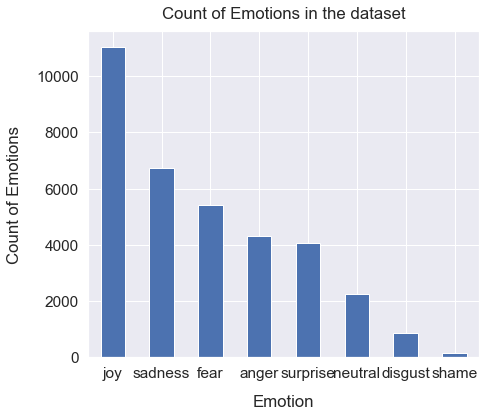

In [13]:
sns.set(font_scale=1.4)
df['Emotion'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Emotion", labelpad=14)
plt.ylabel("Count of Emotions", labelpad=14)
plt.title("Count of Emotions in the dataset", y=1.02);

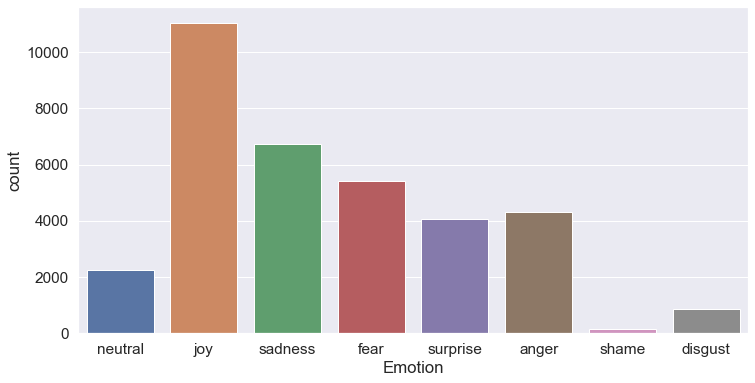

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Emotion',data=df)
plt.show()

In [15]:
!pip install textblob

In [16]:
## Sentiment Analysis
from textblob import TextBlob

C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and

In [17]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        outcome = "Positive"
    elif sentiment < 0:
        outcome = "Negative"
    else:
        outcome = "Neutral"
    return outcome

In [18]:
## test text
get_sentiment("I love NLP")

'Positive'

In [19]:
## Another one
get_sentiment("I hate you")

'Negative'

In [20]:
## Another one 
get_sentiment("I'm still coding")

'Neutral'

In [21]:
df['sentiment'] = df['Text'].apply(get_sentiment)

In [22]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [23]:
## Emotions vs Sentiment
df.groupby(['Emotion',"sentiment"]).size()

Emotion   sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,sentiment'>

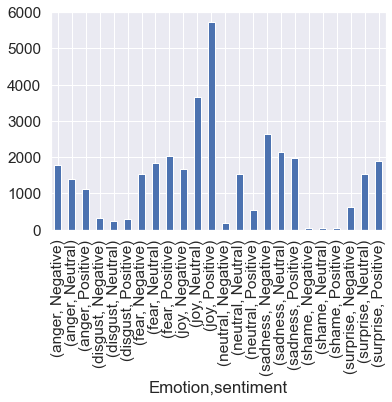

In [24]:
df.groupby(['Emotion',"sentiment"]).size().plot(kind='bar')

C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


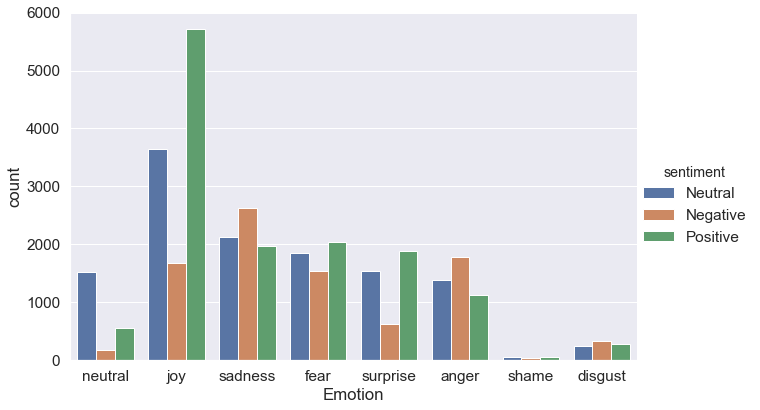

In [25]:
sns.factorplot(x="Emotion",hue='sentiment',data=df,kind='count',size=6,aspect = 1.5)

C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


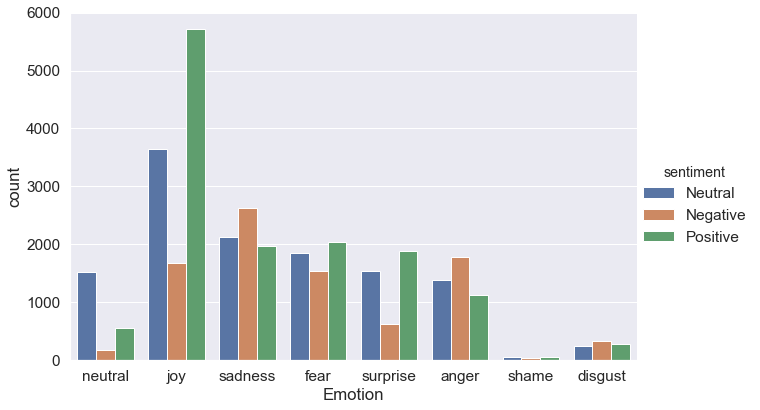

In [26]:
sns.catplot(x="Emotion",hue='sentiment',data=df,kind='count',size=6,aspect = 1.5)

In [27]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [28]:
df['cleaned_text'] = df["Text"].apply(nfx.remove_stopwords)

In [29]:
df['cleaned_text'] = df["Text"].apply(nfx.remove_userhandles)

In [30]:
df['cleaned_text'] = df["Text"].apply(nfx.remove_punctuations)

In [31]:
df[["Text","cleaned_text"]]

,Text,cleaned_text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,@MichelGW have you gift Hope you like it Its h...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,A man robbed me today .,A man robbed me today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of #Losing YOU


In [32]:
from collections import Counter

In [33]:
def extract_features(text,num=50):
    token = [tok for tok in text.split()]
    most_common_tokens = Counter(token).most_common(num)
    return dict(most_common_tokens)

In [34]:
emotion_lst = df['Emotion'].unique().tolist()

In [35]:
emotion_lst

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [36]:
joy_lst = df[df['Emotion'] == 'joy']["cleaned_text"].tolist()

In [37]:
joy_lst

['Sage Act upgrade on my to do list for tommorow',
 ' Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself  ',
 '@Iluvmiasantos ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang ',
 'For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition  ',
 'I have a feeling i will fail french #fuckfrench',
 ' GoodLet  s go now  ',
 'When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhile',
 'One could get terribly ecstatic but t

In [38]:
joy_doc = " ".join(joy_lst)

In [39]:
key_words = extract_features(joy_doc)

In [40]:
key_words

{'the': 5300,
 'to': 4744,
 'I': 4471,
 'a': 3595,
 'and': 3221,
 'of': 2803,
 'my': 2793,
 'in': 2329,
 'for': 1999,
 'is': 1590,
 'with': 1375,
 'you': 1282,
 'that': 1234,
 'was': 1155,
 'me': 1144,
 'at': 1124,
 'on': 1120,
 'it': 1012,
 'have': 962,
 'be': 890,
 'this': 784,
 'day': 729,
 'amp': 678,
 'up': 658,
 'had': 639,
 'all': 636,
 'so': 603,
 'time': 601,
 'Im': 555,
 'when': 544,
 'your': 528,
 'When': 520,
 'The': 516,
 'work': 509,
 'from': 481,
 'not': 480,
 'get': 479,
 'like': 476,
 'an': 473,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'out': 453,
 'just': 452,
 'about': 450,
 'now': 442,
 'are': 438,
 'but': 402,
 'love': 393,
 'i': 387}

In [41]:
def plot_most_common_keywords(mydict,emotion_name):
    df1  = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(24,10))
    plt.title("Most common words of {} keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df1)
    plt.xticks(rotation = 45)
    plt.show()

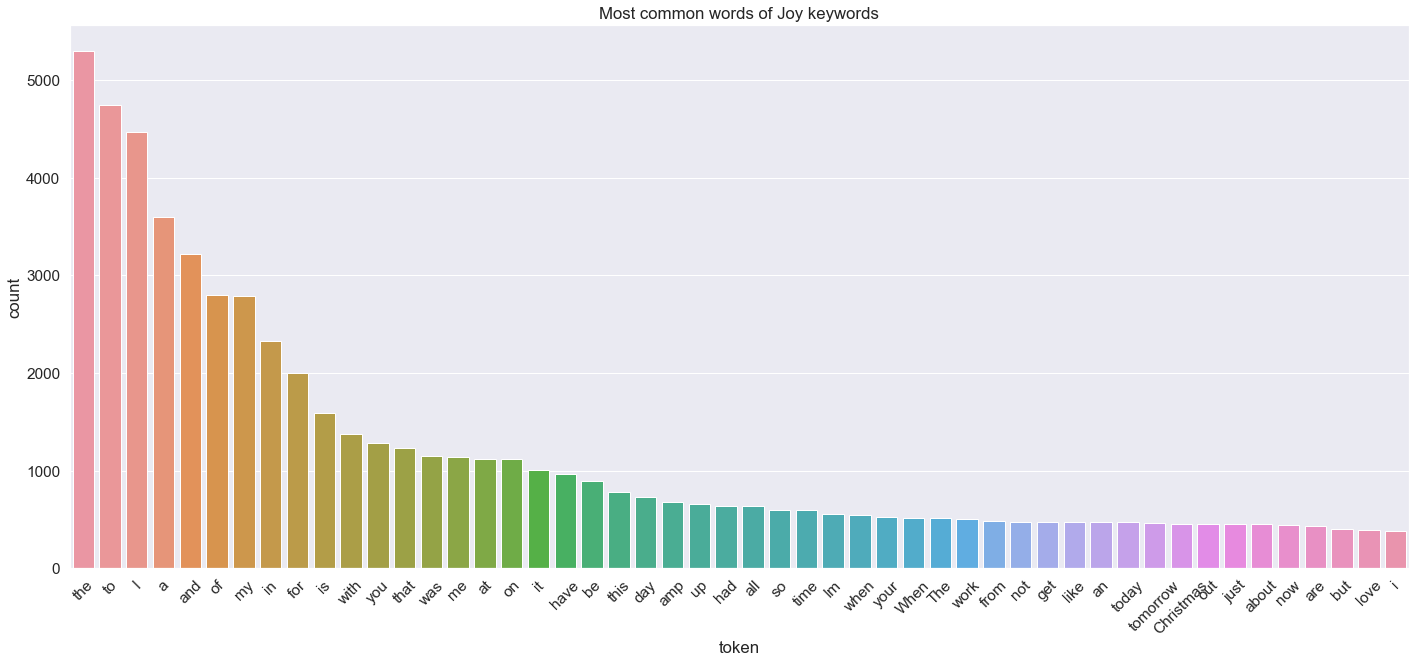

In [42]:
plot_most_common_keywords(key_words,"Joy")

In [43]:
surprise_lst = df[df['Emotion'] == 'surprise']["cleaned_text"].tolist()
surprise_doc = " ".join(surprise_lst)
key_words = extract_features(surprise_doc)

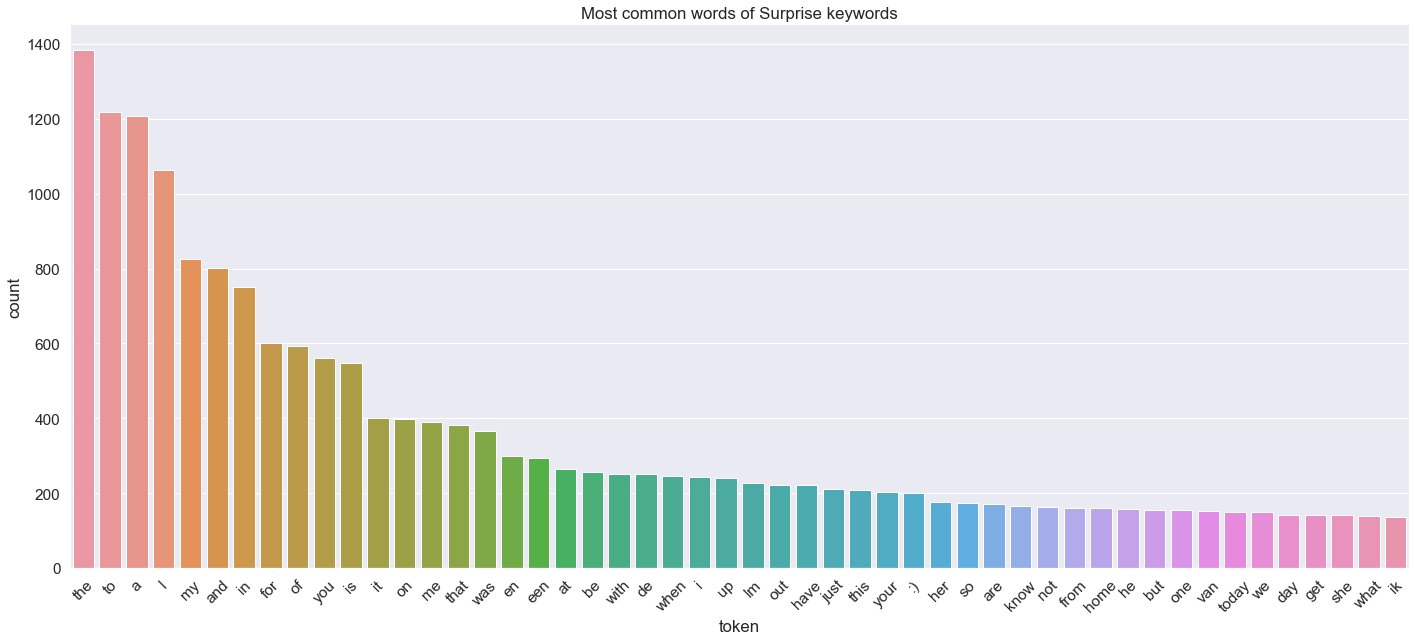

In [44]:
plot_most_common_keywords(key_words,"Surprise")

In [48]:
def plot_word_cloud(doc):
    word_cloud = WordCloud().generate(doc)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

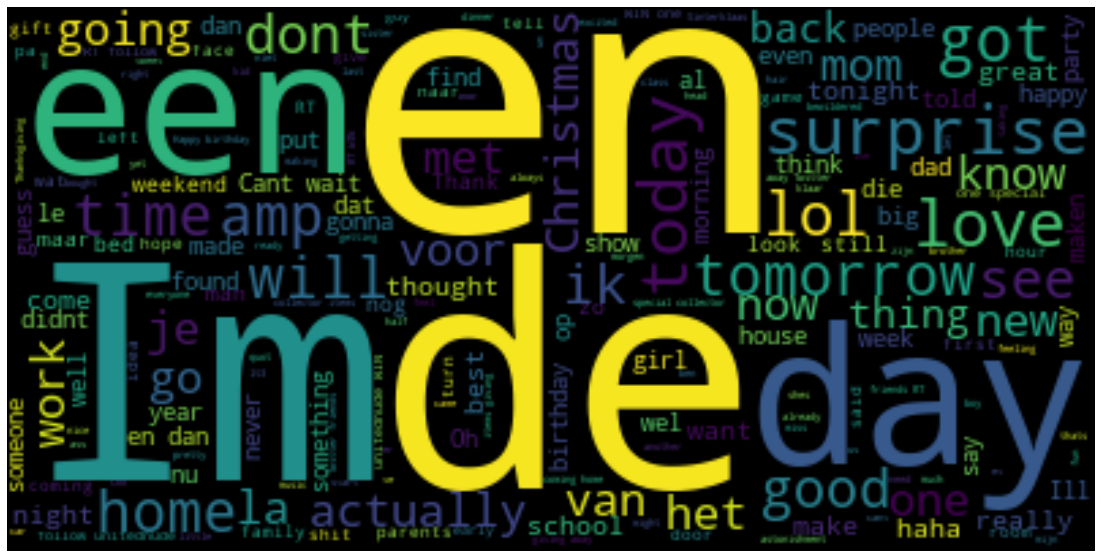

In [50]:
plot_word_cloud(surprise_doc)

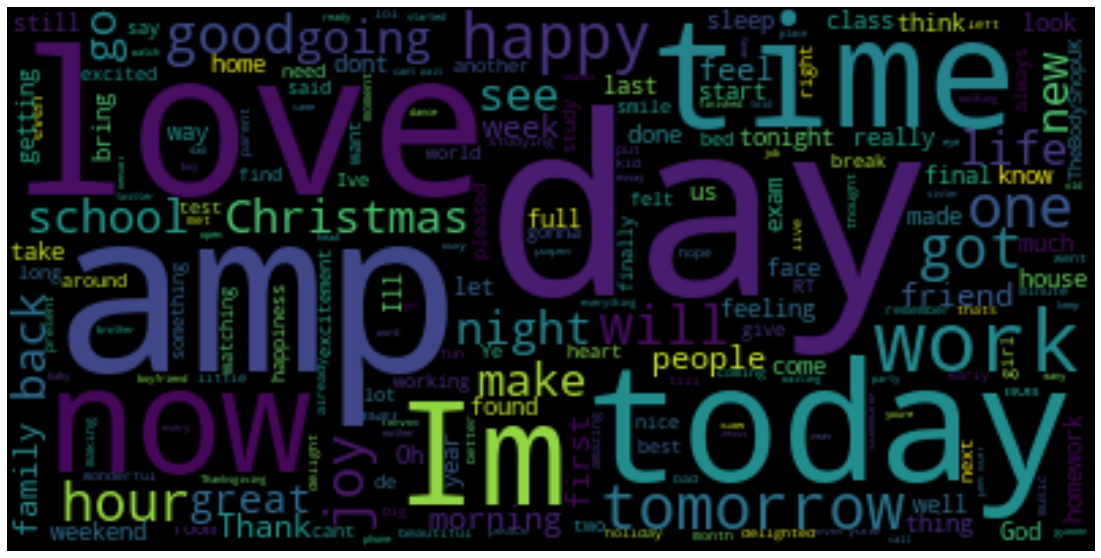

In [51]:
plot_word_cloud(joy_doc)

### Machine Learning 
- Naive Bayes
- Logistic Regression
- KNN
- Decision Tree

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

## Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

## Metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
from sklearn.model_selection import train_test_split

In [56]:
X = df['cleaned_text']
y = df['Emotion']

In [65]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [66]:
vectorizer.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '05thuglife',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100prayingwomen',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '1116am',
 '112',
 '112mark',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '12

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

In [68]:
naive_model = MultinomialNB()

In [70]:
X_train.shape

(24354, 40410)

In [71]:
naive_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
naive_model.score(X_test,y_test)

0.5637095228971067

In [73]:
y_pred = naive_model.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.5637095228971067

In [75]:
sample_text_1 = ['I love NLP']
sample_text_2 = ['I hate you']

In [76]:
vect = vectorizer.transform(sample_text_1).toarray()

In [78]:
vect1 = vectorizer.transform(sample_text_2).toarray()

In [77]:
naive_model.predict(vect)

array(['joy'], dtype='<U8')

In [79]:
naive_model.predict(vect1)

array(['anger'], dtype='<U8')

In [80]:
naive_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [82]:
np.max(naive_model.predict_proba(vect1))

0.32858411428380846

In [93]:
def predict_emotion(text):
    sample_text = vectorizer.transform(text).toarray()
    prediction = naive_model.predict(sample_text)
    predict_prob = naive_model.predict_proba(sample_text)
    preds_classes = dict(zip(naive_model.classes_,predict_prob[0]))
    print("Prediction:{},Prediction Score:{}".format(prediction[0],np.max(predict_prob)))
    return preds_classes

In [94]:
predict_emotion(sample_text_2)

Prediction:anger,Prediction Score:0.32858411428380846


{'anger': 0.32858411428380846,
 'disgust': 0.013719550953727618,
 'fear': 0.14763130808694586,
 'joy': 0.1907303996025054,
 'neutral': 0.0034697708474193192,
 'sadness': 0.2643186281678986,
 'shame': 3.138562266513996e-05,
 'surprise': 0.05151484243502955}

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      1283
     disgust       0.43      0.02      0.04       292
        fear       0.74      0.57      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.75      0.10      0.17       675
     sadness       0.54      0.53      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.59      0.24      0.34      1181

    accuracy                           0.56     10438
   macro avg       0.53      0.35      0.37     10438
weighted avg       0.59      0.56      0.53     10438



C:\Users\Ahmad Abd Elhameed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


In [96]:
confusion_matrix(y_test,y_pred)

array([[ 612,    0,   61,  396,    1,  203,    0,   10],
       [  32,    6,   27,  152,    0,   69,    0,    6],
       [  73,    2,  938,  380,    5,  172,    0,   75],
       [  56,    2,   99, 2903,    6,  178,    0,   67],
       [  27,    0,   17,  437,   65,  123,    0,    6],
       [  85,    0,   61,  752,    6, 1077,    0,   34],
       [   9,    0,    7,   12,    0,    8,    0,    0],
       [  52,    4,   52,  638,    4,  148,    0,  283]], dtype=int64)

In [97]:
## Save model
import joblib
model_file = open("emotion_classifier_naive_bayes.pkl","wb")
joblib.dump(naive_model,model_file)
model_file.close()